In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Helpers
import sys
from datetime import datetime
import pickle

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold
from sklearn.decomposition import PCA,KernelPCA
import lightgbm as lgb

import sys
sys.path.insert(0,'../../') 
from helpers import *
from MAP_estimator import MAP_estimator

# Algorithm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/'

In [11]:
v_family = pd.read_pickle(data_path+'vFamilyName.pkl')
train_y = pd.read_csv(data_path+'train_y.csv')

In [13]:
v_family = pd.merge(train_y,v_family,on='sample_name')

In [15]:
v_family.head()

,sample_name,phenotype_status,TCRBV01,TCRBV02,TCRBV03,TCRBV04,TCRBV05,TCRBV06,TCRBV07,TCRBV08,...,TCRBV23,TCRBV24,TCRBV25,TCRBV26,TCRBV27,TCRBV28,TCRBV29,TCRBV30,TCRBVA,null
0,RA47,1,18,925,518,1078,1973,2137,2152,0,...,35,160,120,0,1111,722,381,9,0,20
1,HC9,0,7,491,305,1139,1484,2320,2353,0,...,19,361,128,0,839,582,335,251,0,30
2,RA29,1,20,934,665,1392,2013,2525,2498,0,...,30,559,199,0,1345,903,584,662,1,33
3,RA8,1,1,204,180,381,830,807,955,0,...,12,137,48,0,378,216,108,102,0,11
4,RA63,1,2,163,130,297,467,549,647,0,...,13,87,34,0,250,228,135,114,1,15


In [22]:
vFamilyName = v_family.drop(['sample_name','phenotype_status'],axis=1).columns.values

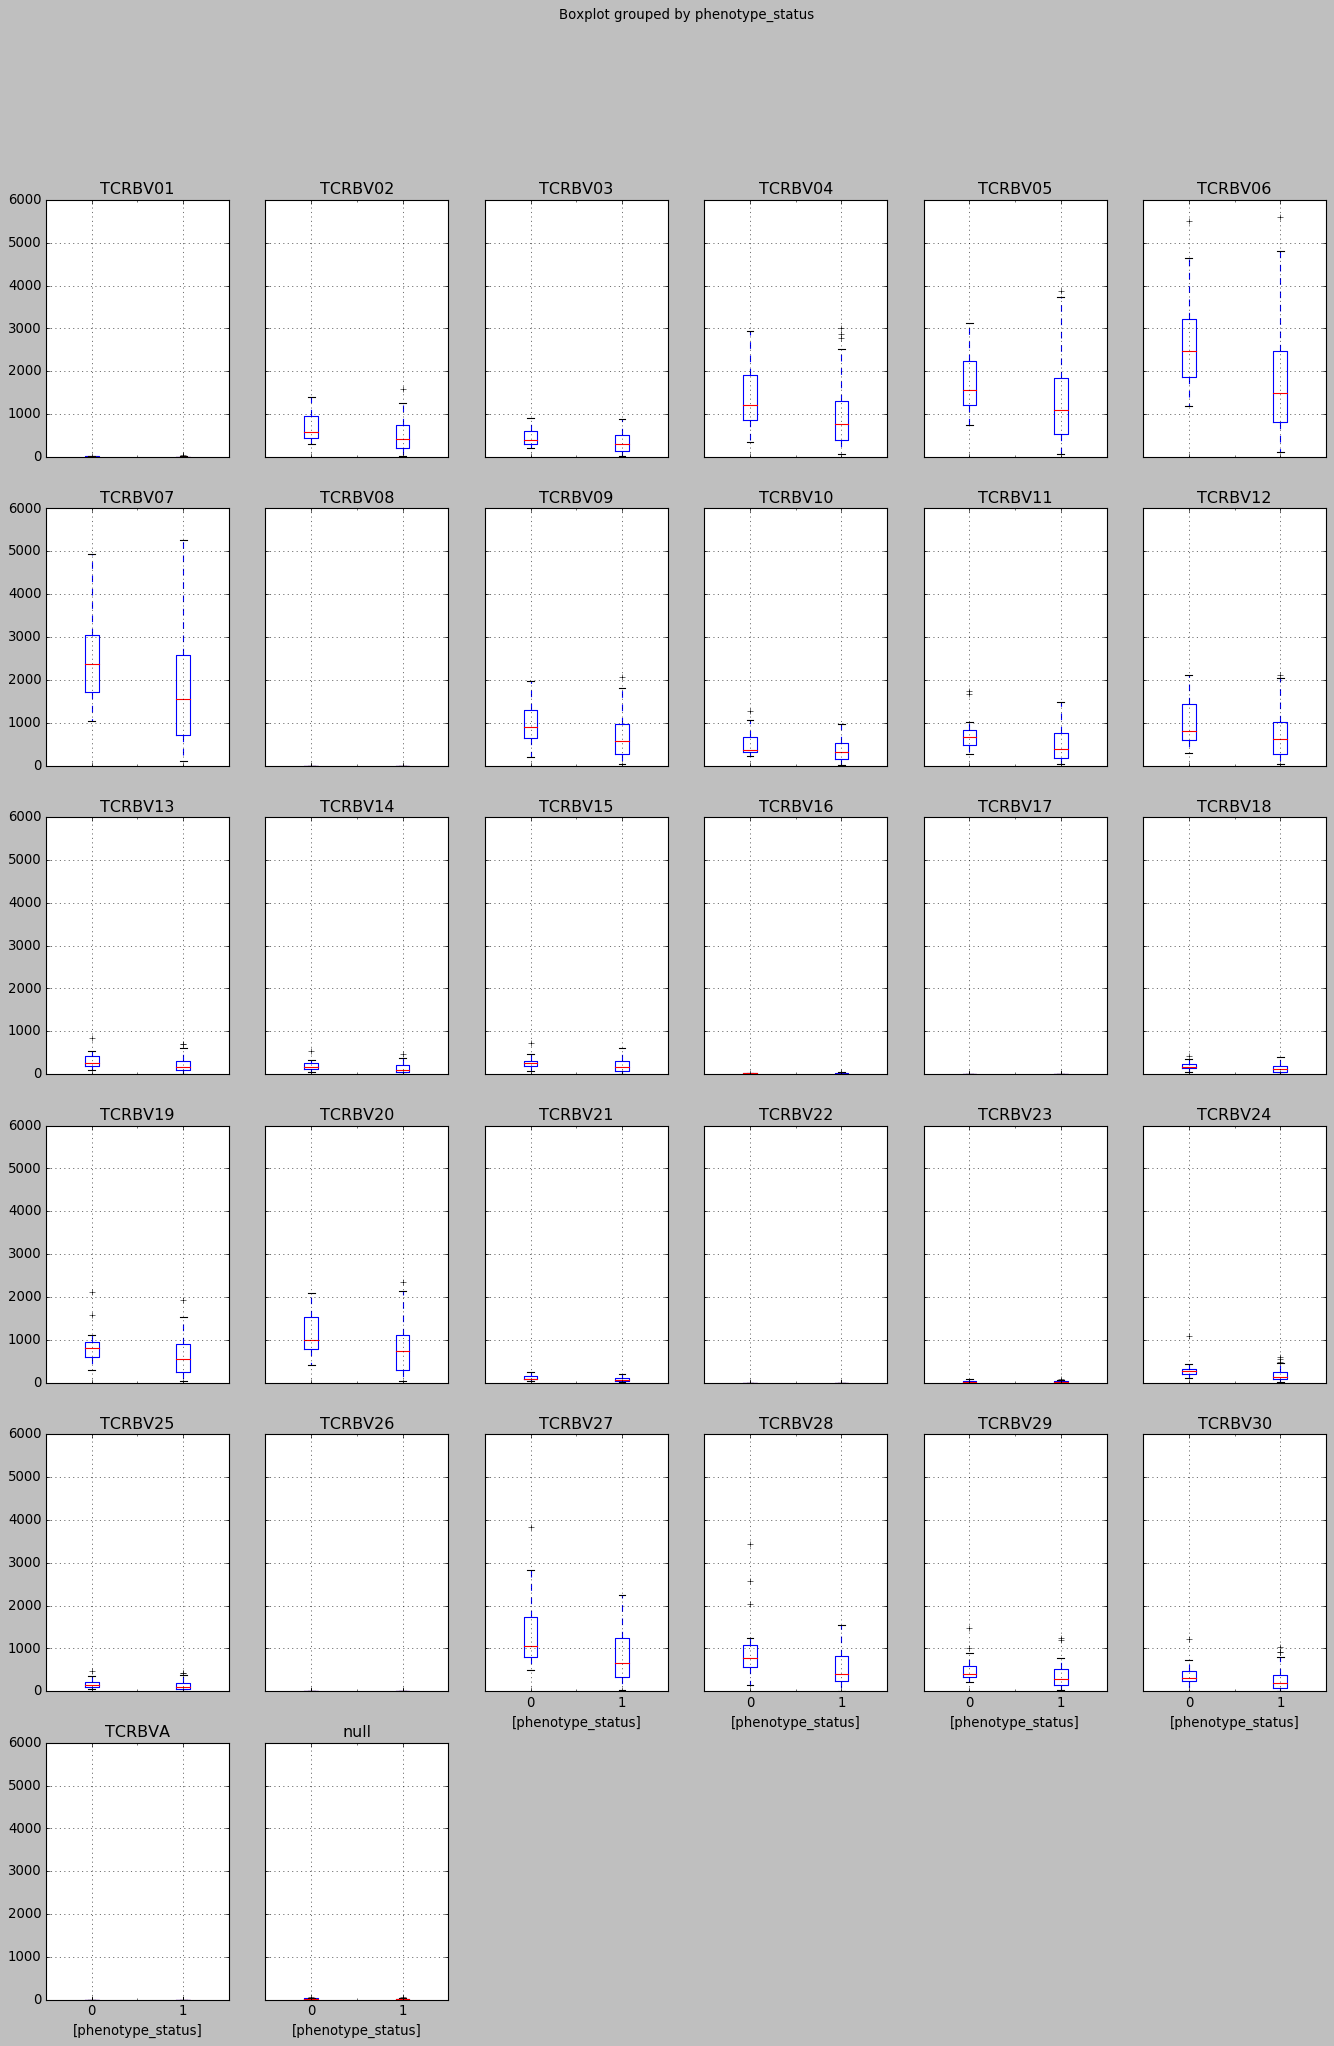

In [85]:
boxplot = v_family.drop(['sample_name'],axis=1).boxplot(by='phenotype_status',figsize=(20,30))

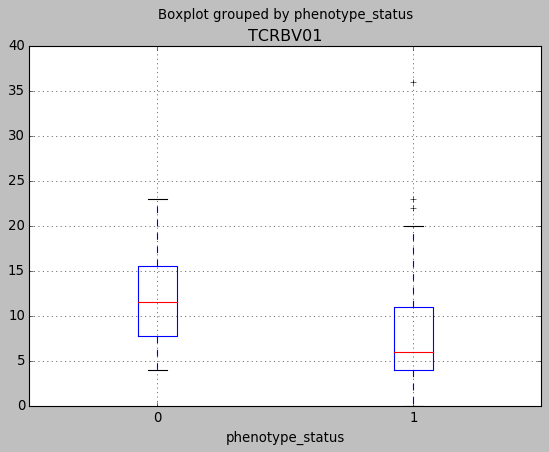

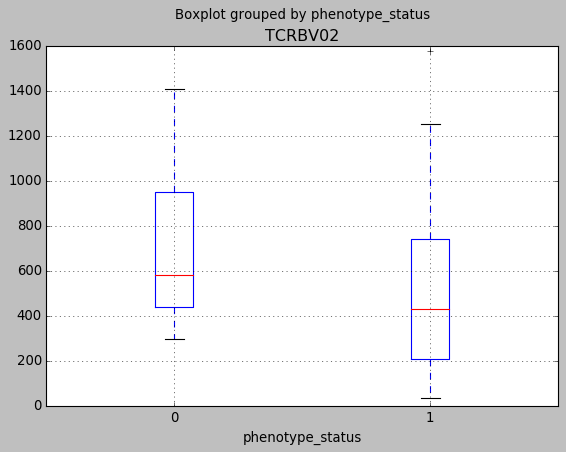

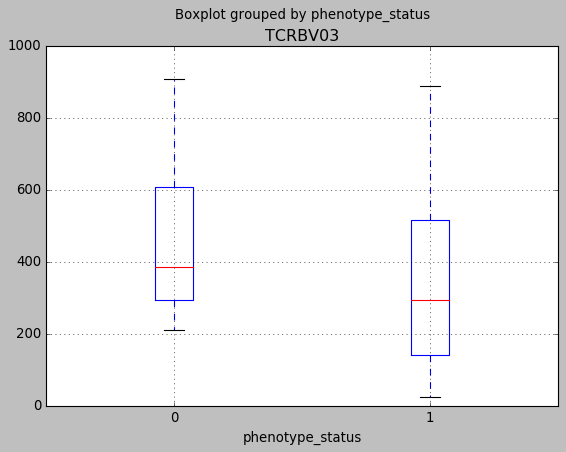

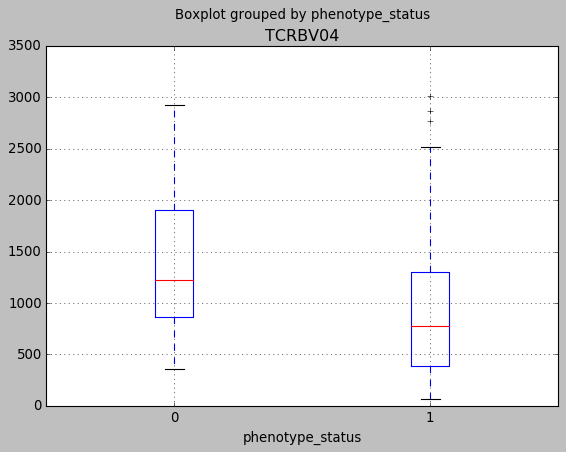

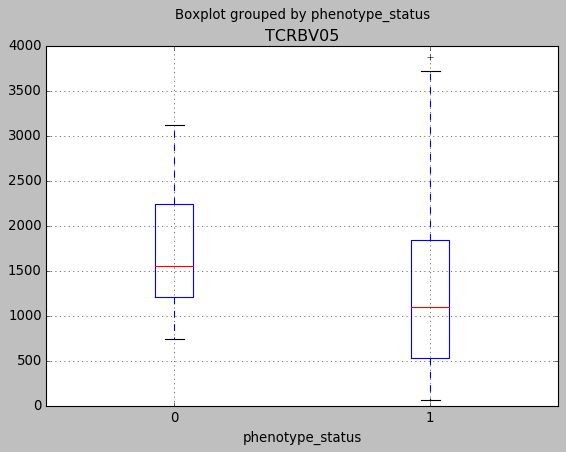

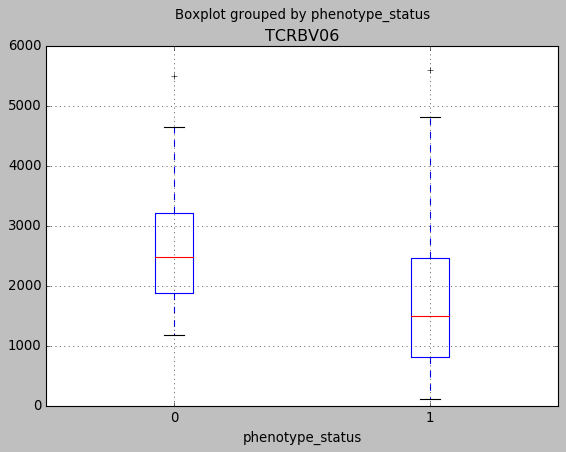

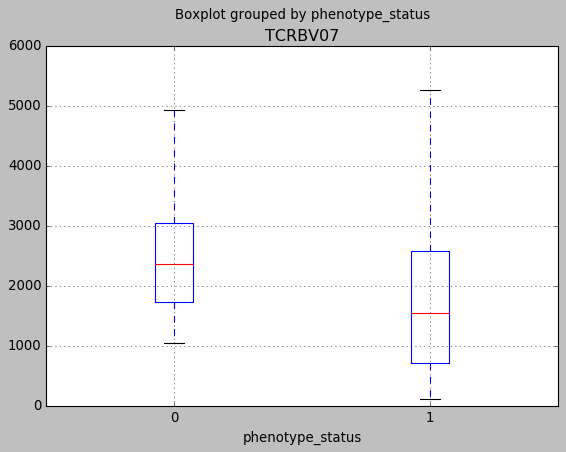

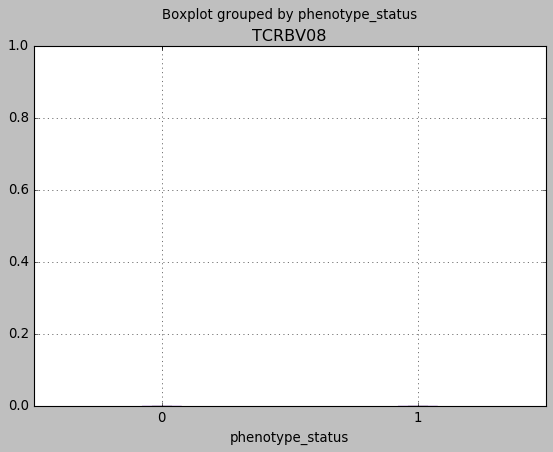

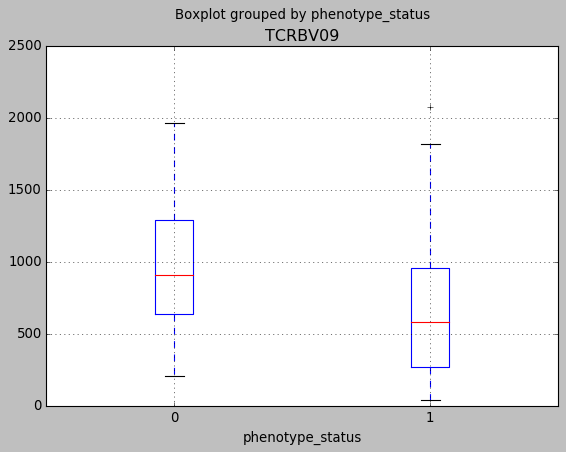

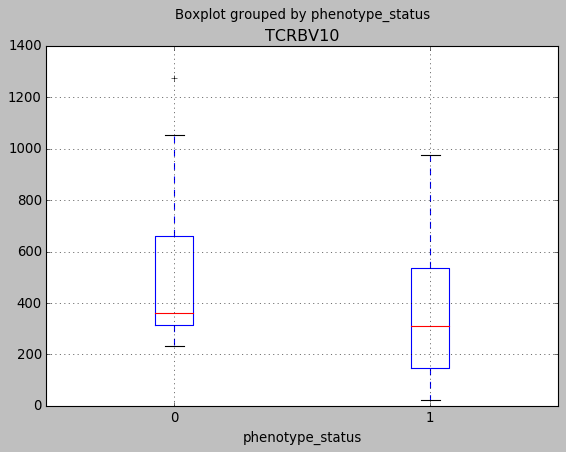

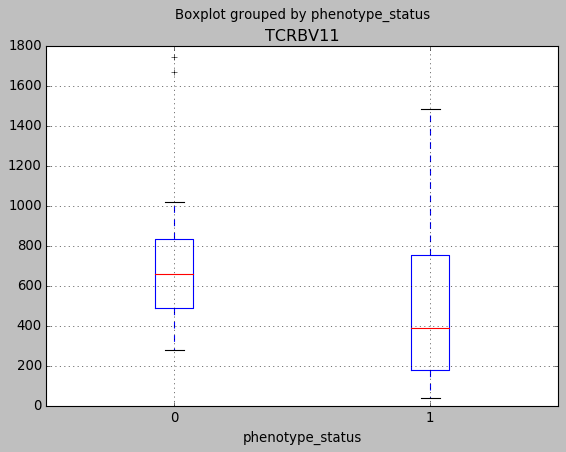

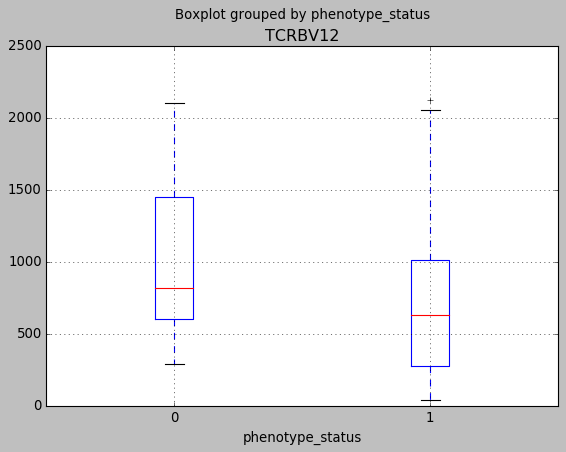

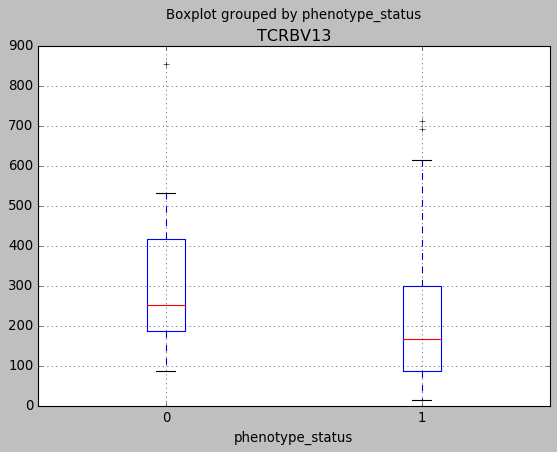

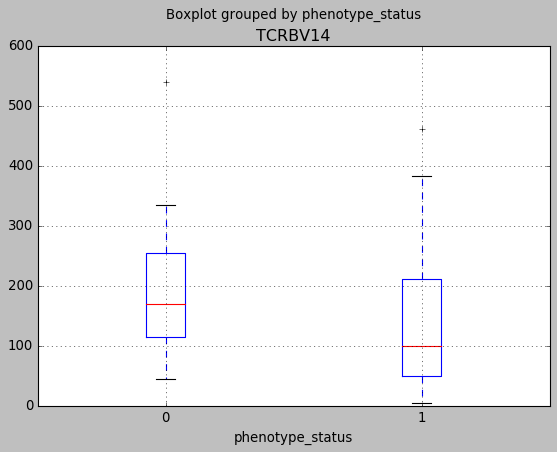

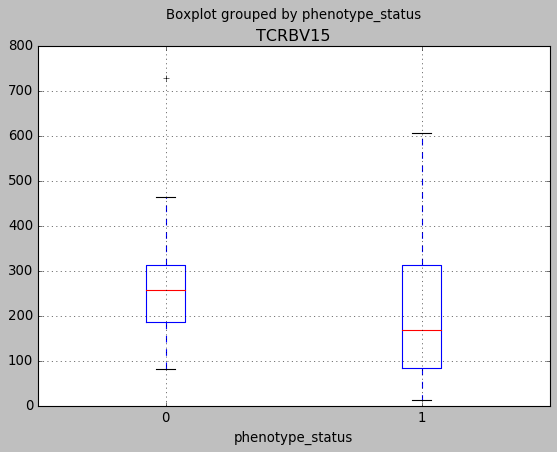

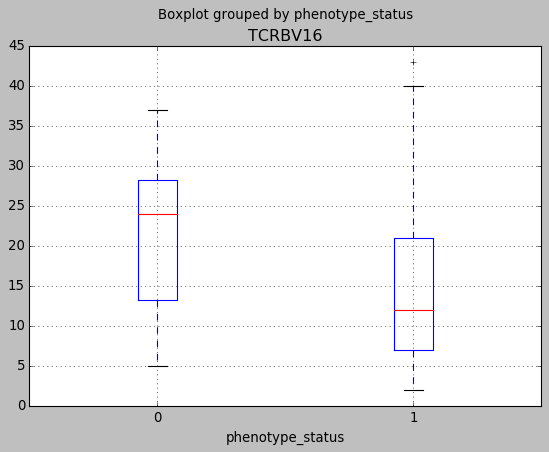

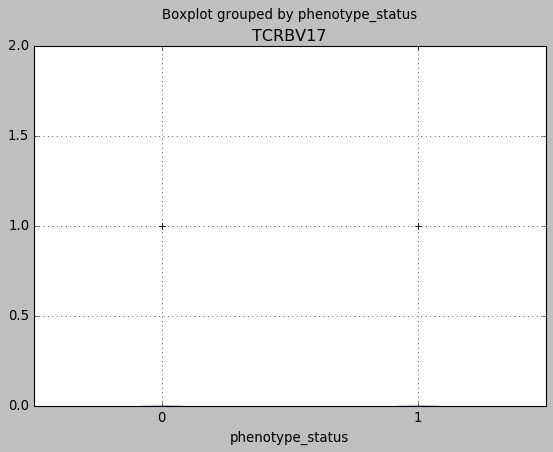

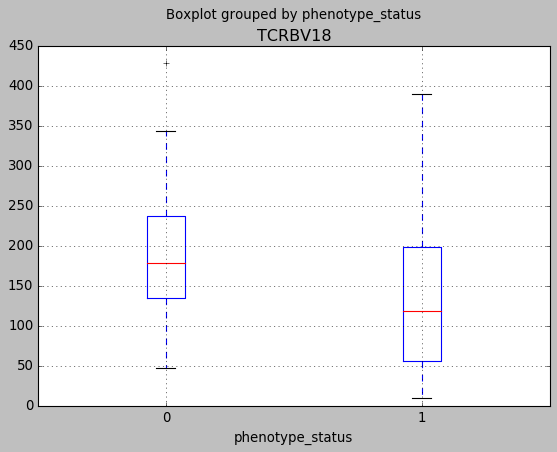

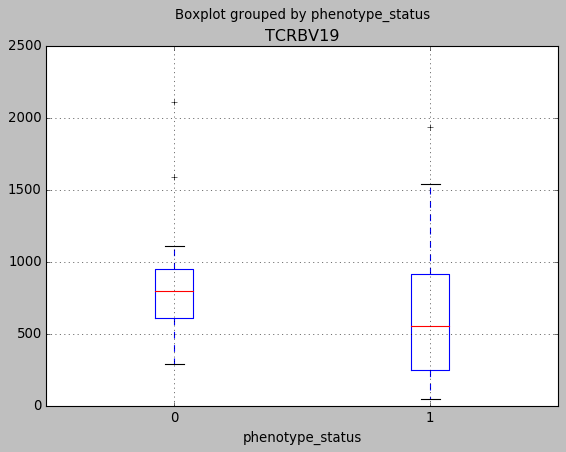

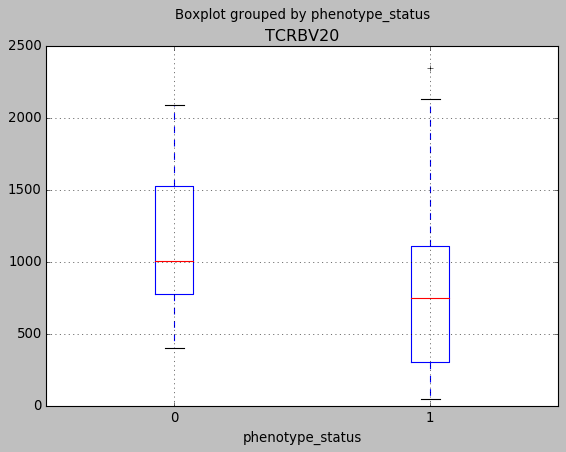

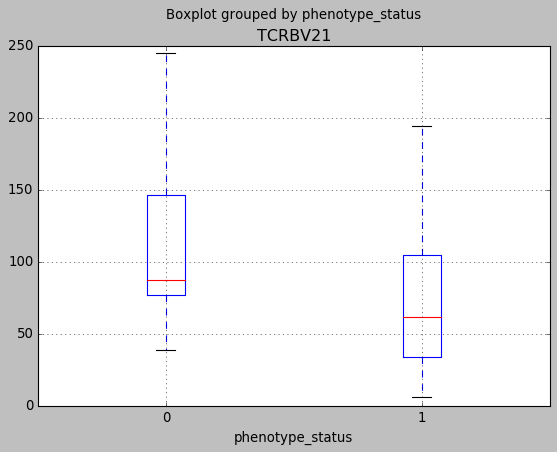

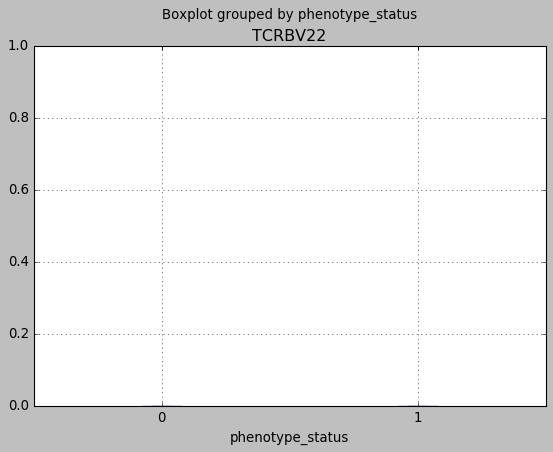

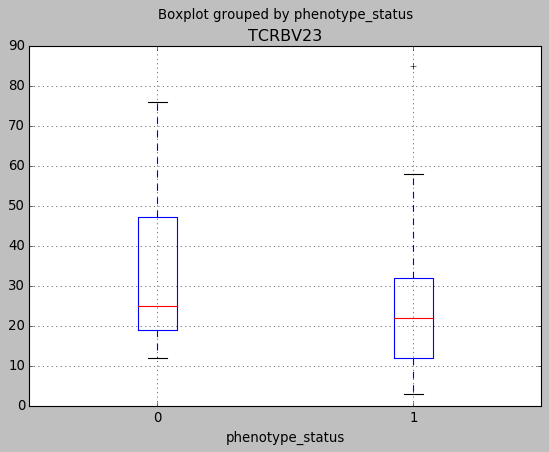

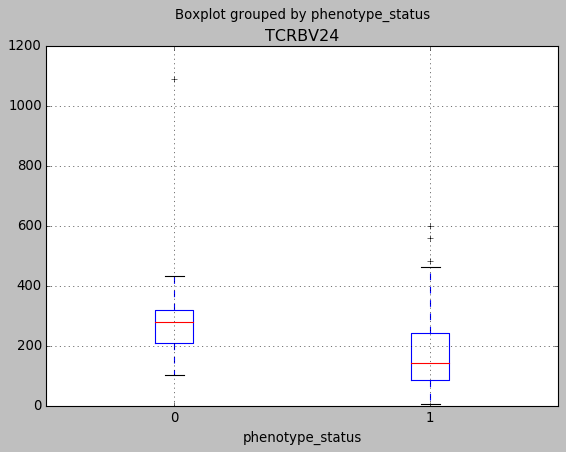

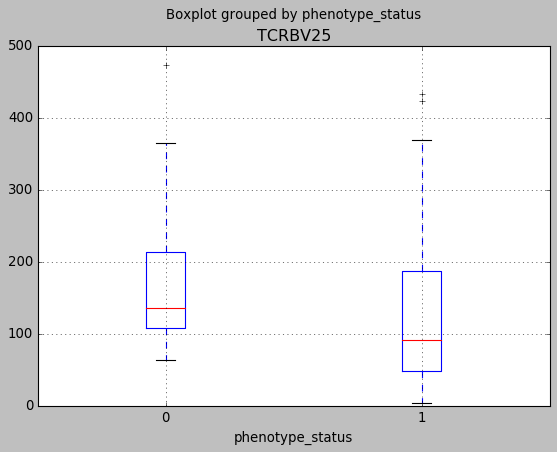

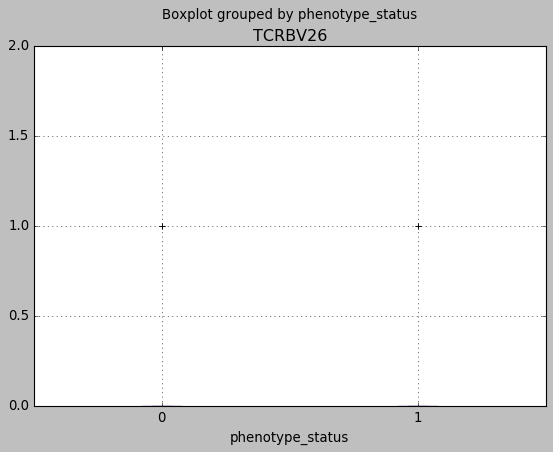

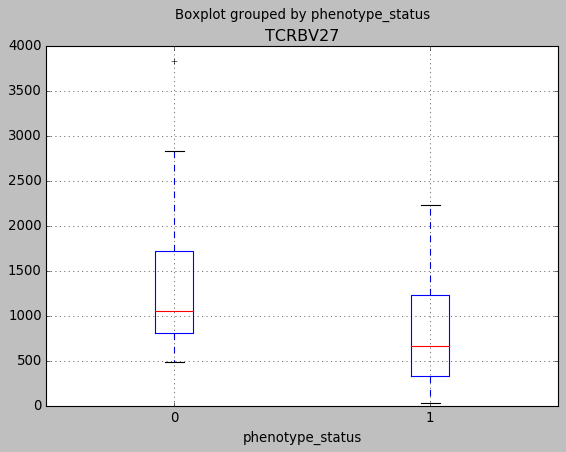

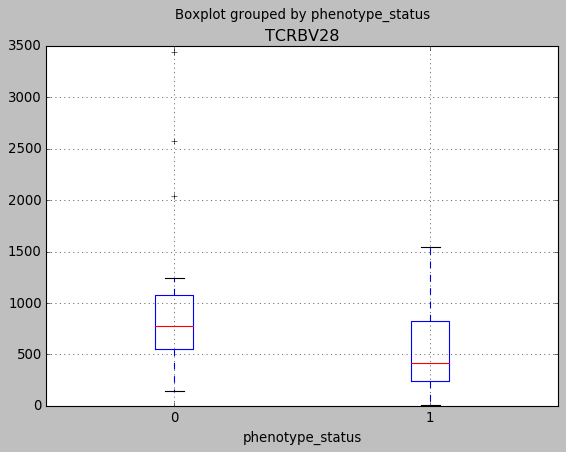

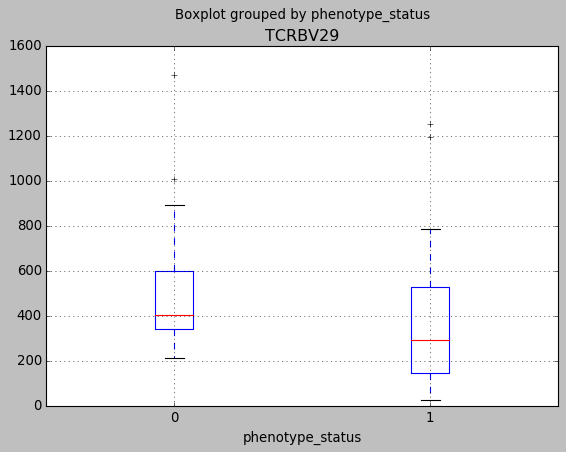

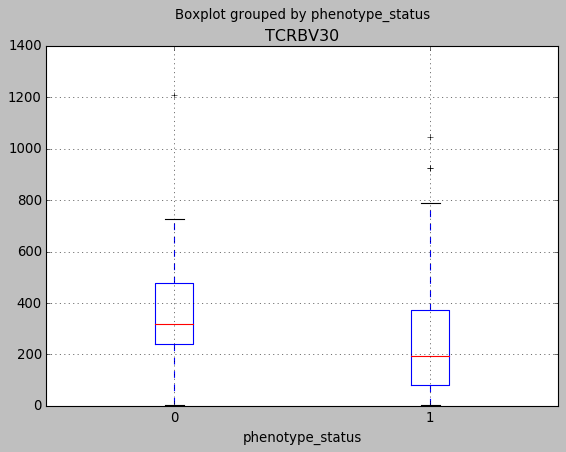

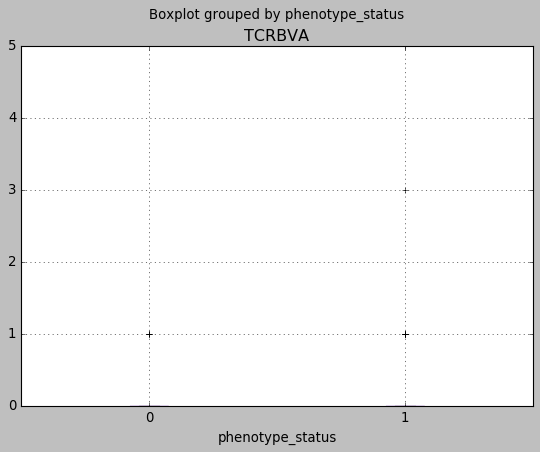

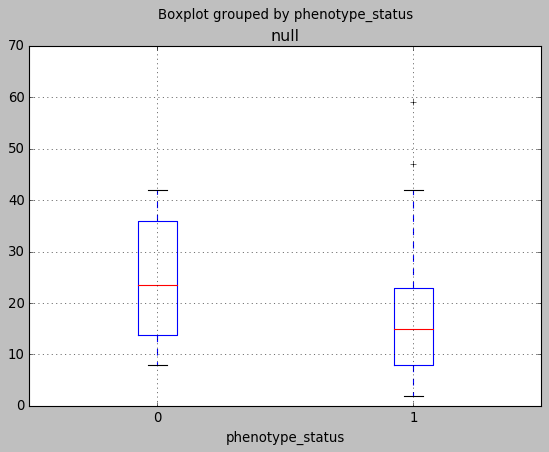

In [76]:
for i in vFamilyName:
    v_family.boxplot(column=i, by='phenotype_status')

In [66]:
count_l = dict()
pos_count = []
neg_count = []
for v in vFamilyName:
    count_l[v] = v_family[v].sum()
    neg_count.append(v_family[v_family['phenotype_status']==0][v].mean())
    pos_count.append(v_family[v_family['phenotype_status']==1][v].mean())
   

In [67]:
vF = [i.replace('TCRBV','') for i in vFamilyName]

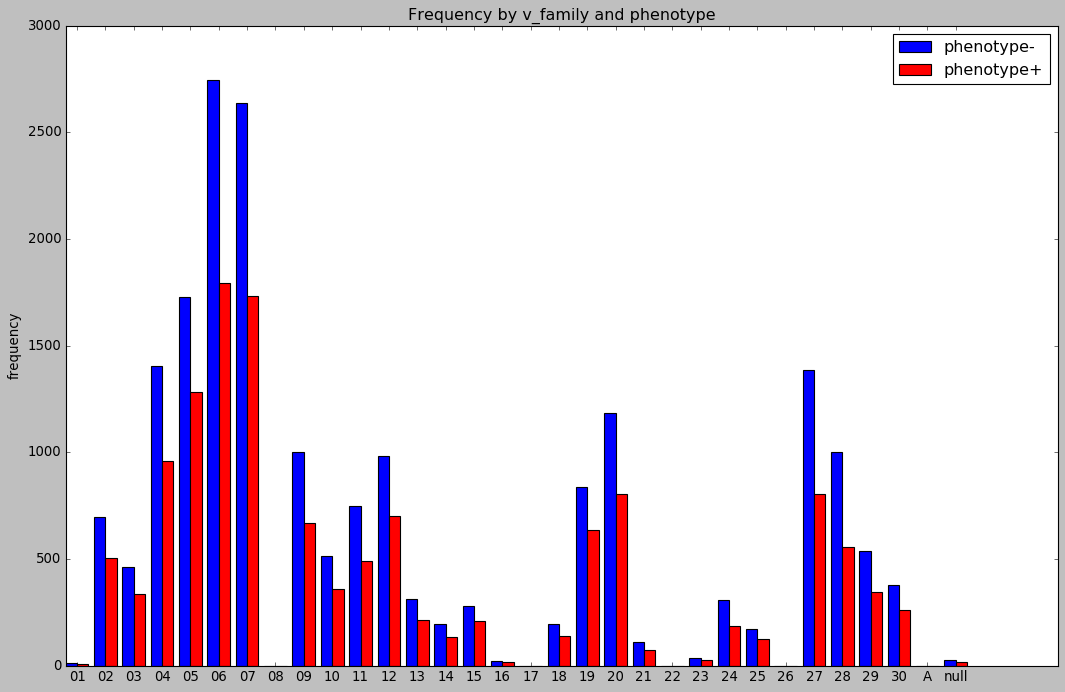

In [68]:
N = len(vFamilyName)

ind = np.arange(N)    # the x locations for the groups
width = 0.4    # the width of the bars: can also be len(x) sequence

plt.style.use('classic')
plt.figure(figsize=(16,10))
p1 = plt.bar(ind, neg_count, width,color='b')
p2 = plt.bar(ind+width, pos_count, width,color='r')

plt.ylabel('frequency')
plt.title('Frequency by v_family and phenotype')
plt.xticks(ind+width, vF)
plt.legend((p1[0], p2[0]), ('phenotype-', 'phenotype+'), loc='best')

plt.show()